In [44]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 8x8 像素的手写数字图像（0-9）
X_digits,y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_digits,y_digits,random_state=42)

In [45]:
X_digits.shape

(1797, 64)

In [46]:
y_digits.shape

(1797,)

逻辑回归正确率

半监督学习：利用少量的有标签数据和大量的无标签数据来进行模型训练

In [47]:
from sklearn.linear_model import LogisticRegression
n_labels = 50
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labels],y_train[:n_labels])
log_reg.score(X_test,y_test)

0.8266666666666667

K_means正确率

In [48]:
from sklearn.cluster import KMeans
k = 10
kmeans = KMeans(n_clusters=k,random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [49]:
X_digits_dist.shape

(1347, 10)

In [50]:
# axis 0 行  1 列
cloest_idx = np.argmin(X_digits_dist,axis=0)
cloest_idx.shape

(10,)

In [51]:
X_representive_digits = X_train[cloest_idx]
X_representive_digits.shape

(10, 64)

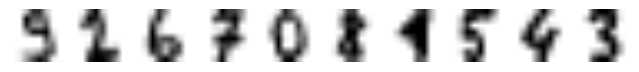

In [52]:
plt.figure(figsize=(8,2))
for index, X_representive_digit in enumerate(X_representive_digits):
    plt.subplot(k//10,10,index+1)
    plt.imshow(X_representive_digit.reshape((8,8)),cmap="binary",interpolation="bilinear")
    plt.axis('off')
plt.show()